Name: Vishnu Kumar S.R
USN:20BTRCL030

In [2]:
from keras.applications.mobilenet_v2 import MobileNetV2,preprocess_input

In [3]:
from tensorflow.keras.layers import Lambda,Input,Dense,Flatten
from tensorflow.keras.models import Model 
from keras.preprocessing import image
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

In [4]:
image_size=[224,224]
train='C:/Users/vknsr/Downloads/training'
test='C:/Users/vknsr/Downloads/testing'

In [6]:
# we r not performing training so we are taking weights from imagenet include_top is remove output layer
mobilenet=MobileNetV2(input_shape=image_size+[3],weights='imagenet',include_top=False)

9406464/9406464 [==============================] - 2s 0us/step


In [8]:
for layer in mobilenet.layers:
    layer.trainable=False

In [9]:
folders=glob('C:/Users/vknsr/Downloads/training/*')
folders

['C:/Users/vknsr/Downloads/training\\cat',
 'C:/Users/vknsr/Downloads/training\\dog']

In [10]:
x=Flatten()(mobilenet.output)

In [11]:
prediction=Dense(len(folders),activation='sigmoid')(x)

In [12]:
model=Model(inputs=mobilenet.input,outputs=prediction)

In [13]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

In [14]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [15]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)
training_set=train_datagen.flow_from_directory('C:/Users/vknsr/Downloads/training',target_size=(224,224),batch_size=32,class_mode='categorical')
test_set=test_datagen.flow_from_directory('C:/Users/vknsr/Downloads/testing',target_size=(224,224),batch_size=32,class_mode='categorical')

Found 30 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [17]:
mobilenet=model.fit_generator(training_set,epochs=10,validation_data=test_set,steps_per_epoch=len(training_set),validation_steps=len(test_set))

<ipython-input-17-a7a72bb14519>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  mobilenet=model.fit_generator(training_set,epochs=10,validation_data=test_set,steps_per_epoch=len(training_set),validation_steps=len(test_set))


Epoch 1/10
1/1 [==============================] - 2s 2s/step - loss: 0.1091 - accuracy: 0.9667 - val_loss: 1.5900 - val_accuracy: 0.7000
Epoch 2/10
1/1 [==============================] - 1s 1s/step - loss: 9.1073e-05 - accuracy: 1.0000 - val_loss: 1.2700 - val_accuracy: 0.8000
Epoch 3/10
1/1 [==============================] - 1s 1s/step - loss: 5.0714e-06 - accuracy: 1.0000 - val_loss: 1.1037 - val_accuracy: 0.9000
Epoch 4/10
1/1 [==============================] - 1s 1s/step - loss: 5.7001e-05 - accuracy: 1.0000 - val_loss: 1.0255 - val_accuracy: 0.9000
Epoch 5/10
1/1 [==============================] - 1s 1s/step - loss: 3.8452e-08 - accuracy: 1.0000 - val_loss: 0.9935 - val_accuracy: 0.9000
Epoch 6/10
1/1 [==============================] - 1s 1s/step - loss: 1.5872e-06 - accuracy: 1.0000 - val_loss: 0.9770 - val_accuracy: 0.9000
Epoch 7/10
1/1 [==============================] - 1s 1s/step - loss: 3.2383e-07 - accuracy: 1.0000 - val_loss: 0.9656 - val_accuracy: 0.9000
Epoch 8/10
1/1 [=

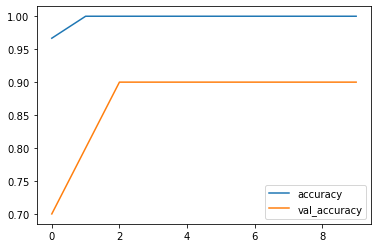

In [20]:
plt.plot(mobilenet.history['accuracy'],label='accuracy')
plt.plot(mobilenet.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

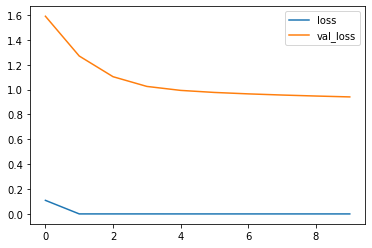

In [21]:
plt.plot(mobilenet.history['loss'],label='loss')
plt.plot(mobilenet.history['val_loss'],label='val_loss')
plt.legend()
plt.show()